<a href="https://colab.research.google.com/github/shamiya829/sofi-stock-analysis/blob/main/CodingAssignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import yfinance as yf
import pandas as pd

stock_symbols = ['AAPL', 'MSFT', 'TSLA', 'AMZN']

# 1 year data
start_date = '2023-02-01'
end_date = '2024-02-01'

all_stocks_data = pd.DataFrame()

for symbol in stock_symbols:
    stock_data = yf.download(symbol, start=start_date, end=end_date)
    stock_data['Symbol'] = symbol  #symbol
    all_stocks_data = pd.concat([all_stocks_data, stock_data], axis=0)

all_stocks_data.reset_index(inplace=True)

all_stocks_data.to_csv('stock_data.csv', index=False)


/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [3]:
import pandas as pd

stock_data = pd.read_csv('stock_data.csv')

descriptive_stats = stock_data.describe()

print(descriptive_stats)


              Open         High          Low        Close    Adj Close  \
count  1004.000000  1004.000000  1004.000000  1004.000000  1004.000000   
mean    213.160110   215.799154   210.635348   213.339383   212.779884   
std      79.169795    79.840014    78.457121    79.164994    78.715115   
min      89.970001    92.230003    88.120003    90.730003    90.730003   
25%     152.302505   153.977497   150.857502   152.799995   152.104584   
50%     189.904999   191.855003   188.235001   189.959999   189.717911   
75%     265.457497   269.092491   260.954994   264.777489   264.010780   
max     412.260010   415.320007   406.450012   409.720001   408.963715   

             Volume  
count  1.004000e+03  
mean   6.797135e+07  
std    4.363569e+07  
min    1.017660e+07  
25%    3.870160e+07  
50%    5.322830e+07  
75%    9.704530e+07  
max    2.326620e+08  


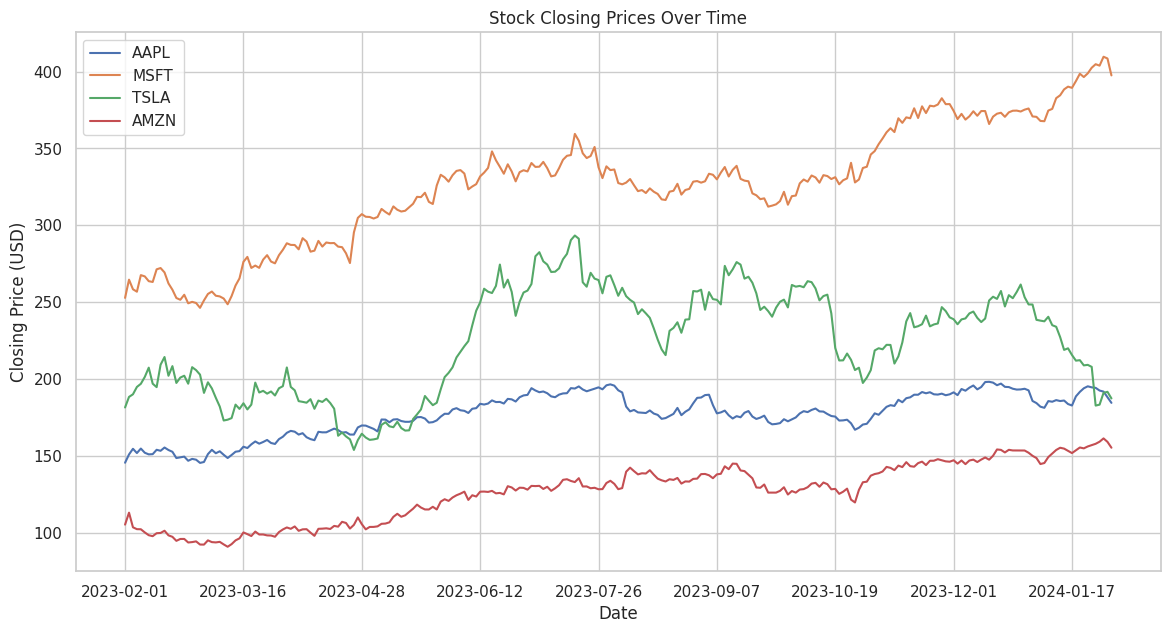

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator


sns.set(style="whitegrid")

# closing prices of each stock over time
plt.figure(figsize=(14, 7))
for symbol in stock_data['Symbol'].unique():
    plt.plot(stock_data[stock_data['Symbol'] == symbol]['Date'], stock_data[stock_data['Symbol'] == symbol]['Close'], label=symbol)

plt.title('Stock Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(nbins=10))
plt.show()






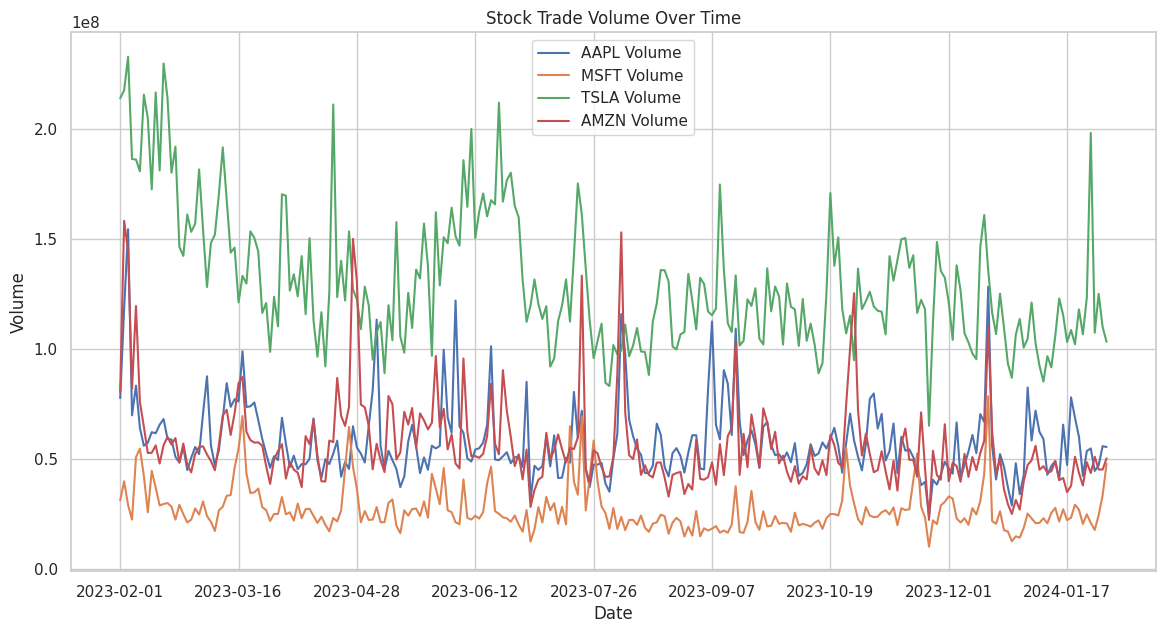

In [9]:
# trade volume for each stock over time
plt.figure(figsize=(14, 7))
for symbol in stock_data['Symbol'].unique():
    plt.plot(stock_data[stock_data['Symbol'] == symbol]['Date'], stock_data[stock_data['Symbol'] == symbol]['Volume'], label=symbol + ' Volume')

plt.title('Stock Trade Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(nbins=10))
plt.show()


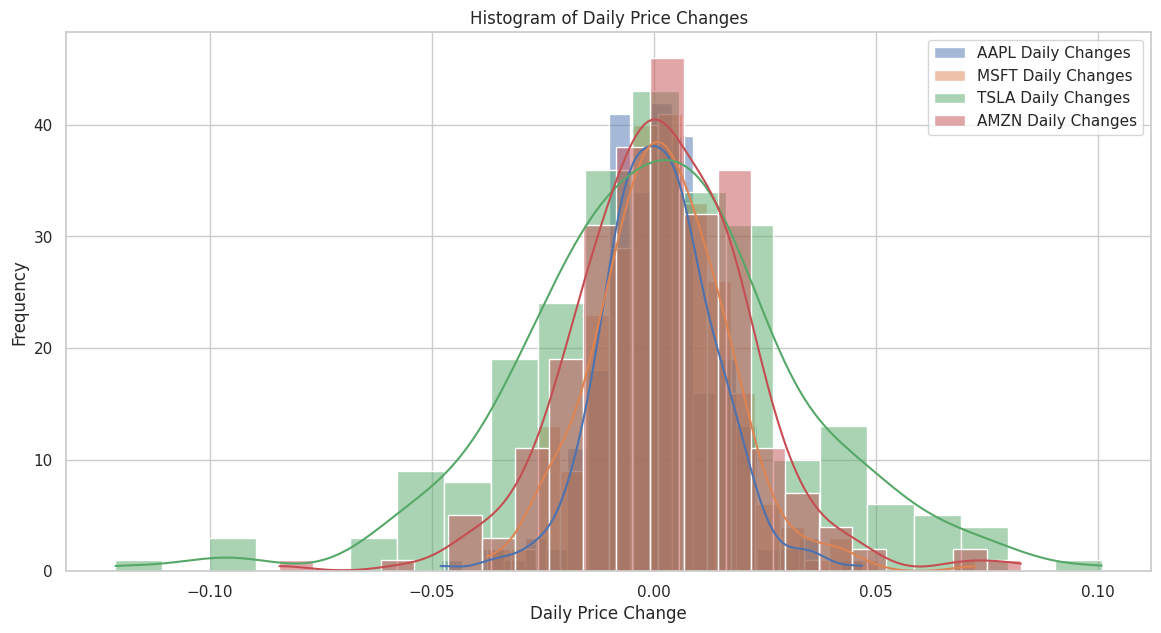

In [10]:
# histogram of daily price changes
plt.figure(figsize=(14, 7))
for symbol in stock_data['Symbol'].unique():
    daily_changes = stock_data[stock_data['Symbol'] == symbol]['Close'].pct_change().dropna()
    sns.histplot(daily_changes, label=f'{symbol} Daily Changes', kde=True)

plt.title('Histogram of Daily Price Changes')
plt.xlabel('Daily Price Change')
plt.ylabel('Frequency')
plt.legend()
plt.show()


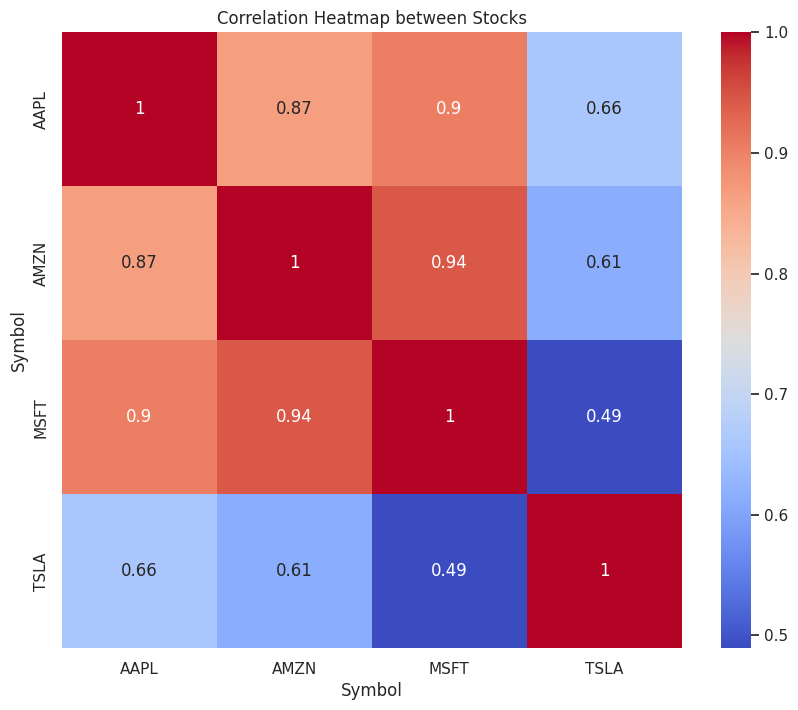

In [11]:
# correlation matrix for the closing prices of each stock
closing_prices = stock_data.pivot(index='Date', columns='Symbol', values='Close')
correlation_matrix = closing_prices.corr()

# heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap between Stocks')
plt.show()
